### Linear Regression Assignment

#### Car Price Assignment

##### Problem Statement
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. 

The company wants to know:

- Which variables are significant in predicting the price of a car
- How well those variables describe the price of a car

In [92]:
#Importing all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

sns.set_style("whitegrid")
pd.set_option('display.max_columns', 500)

In [93]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

## Step 1: Reading the Data

In [94]:
# Reading CSV file into DataFrame.
df_Cars = pd.read_csv("CarPrice_Assignment.csv")

In [95]:
# Check the no of rows and columns of data
df_Cars.shape

(205, 26)

In [96]:
# Check the head of the dataset
df_Cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [97]:
df_Cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [98]:
#Describe Numerical data
df_Cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [99]:
# Percentage of Missing Values Check
round(100*(df_Cars.isnull().sum()/len(df_Cars.index)),2)

car_ID              0.0
symboling           0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
dtype: float64

In [100]:
# Column wise Unique Values Count
df_Cars.nunique(axis = 0)

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

### Data Preparation

In [101]:
# Code to sanitize column names remove extra spaces
df_Cars.columns=df_Cars.columns.map(lambda x:x.strip())

In [102]:
#Creating new column CarCompany after splitting by space and storing the first part
df_Cars['CarCompany'] = df_Cars['CarName'].apply(lambda x: x.split()[0])

In [103]:
df_Cars.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000,audi
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000,audi
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000,audi
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000,audi
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000,audi
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167,audi


In [104]:
#Unique values in Car Company columns 
df_Cars['CarCompany'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [105]:
#Lets fix the Car Company names in the Car Company column

df_Cars = df_Cars.replace(to_replace ="maxda", 
                 value ="mazda") 
df_Cars = df_Cars.replace(to_replace ="porcshce", 
                 value ="porsche") 
df_Cars = df_Cars.replace(to_replace ="toyouta", 
                 value ="toyota") 
df_Cars = df_Cars.replace(to_replace ="vokswagen", 
                 value ="volkswagen") 
df_Cars = df_Cars.replace(to_replace ="vw", 
                 value ="volkswagen") 
df_Cars = df_Cars.replace(to_replace ="Nissan", 
                 value ="nissan") 

In [106]:
#Total count of unique values in each column.
df_Cars.nunique(axis = 0)

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
CarCompany           22
dtype: int64

In [107]:
#Unique values in Car Company columns after renaming
df_Cars['CarCompany'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [108]:
df_Cars['doornumber'].unique()

array(['two', 'four'], dtype=object)

In [109]:
df_Cars['cylindernumber'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

#### Above we can see two columns having same values like two and four let's rename for removing confusion

In [110]:
# Defining the map function
def binary_map(x):
    return x.map({'two': '2doors', 'four': '4doors'})

# Applying the function to the df_Cars
df_Cars[['doornumber']] = df_Cars[['doornumber']].apply(binary_map)

## Step 2: Visualising the Data

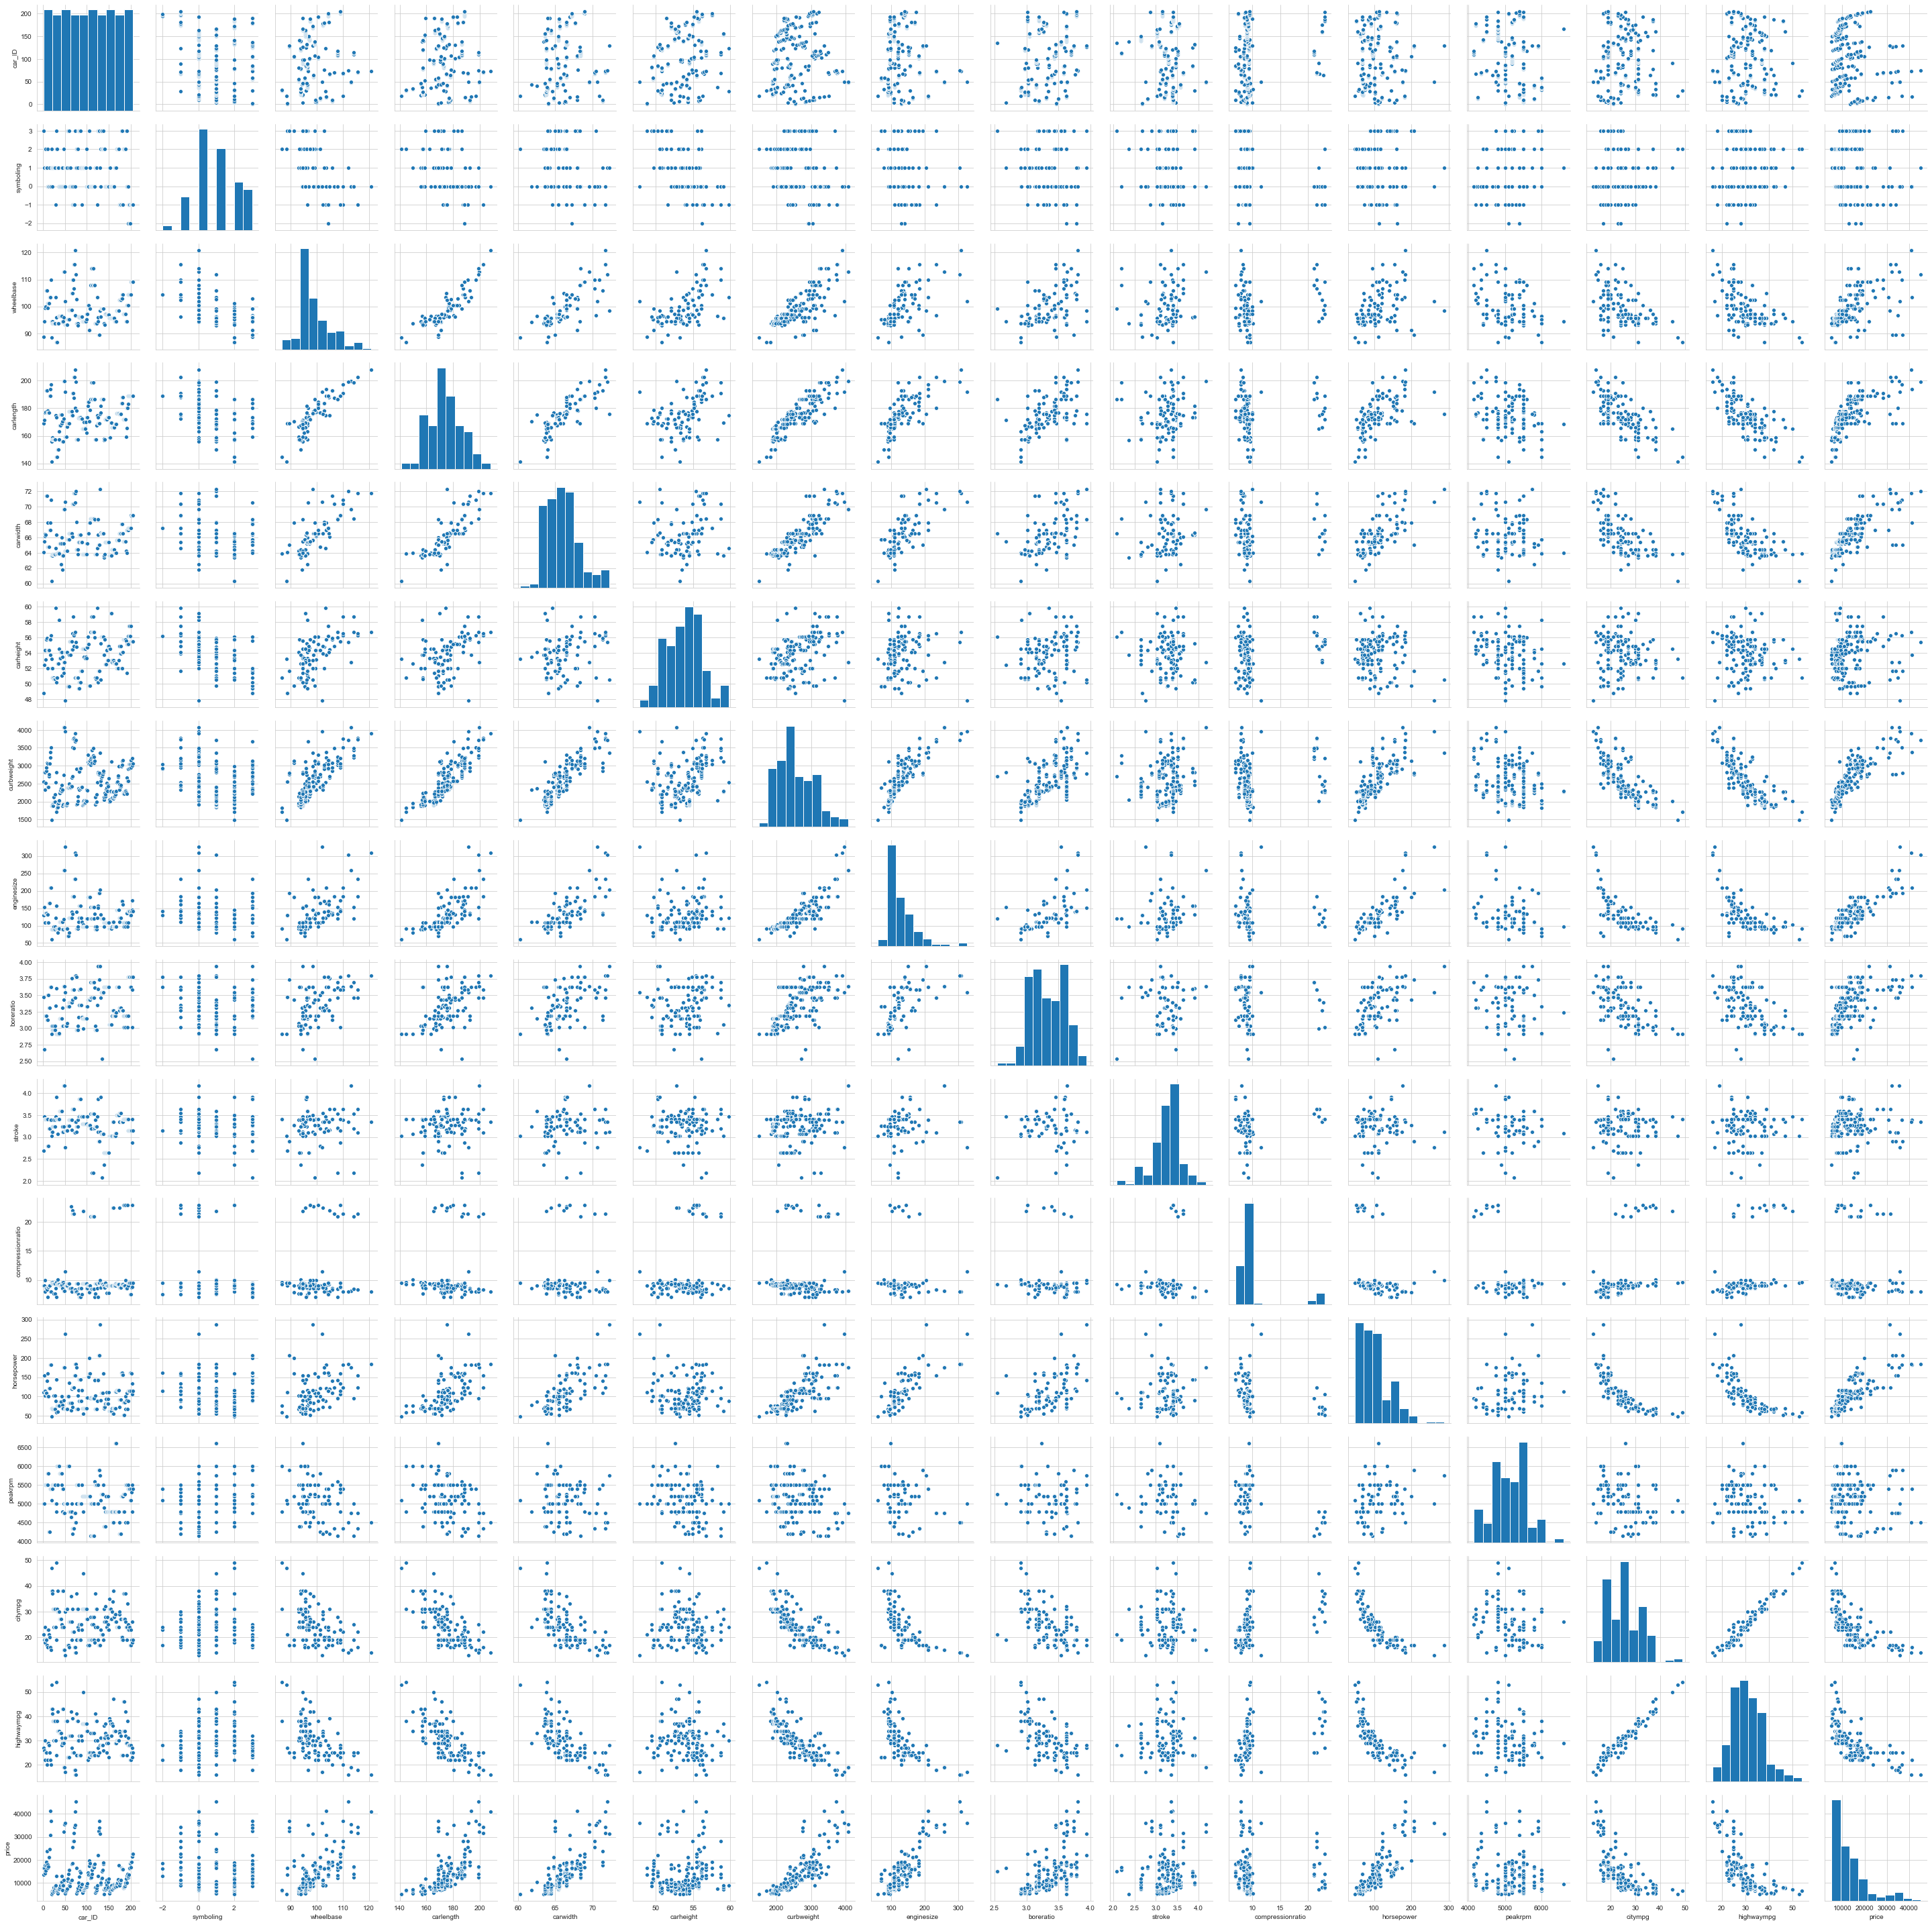

In [111]:
sns.pairplot(df_Cars)
plt.show()

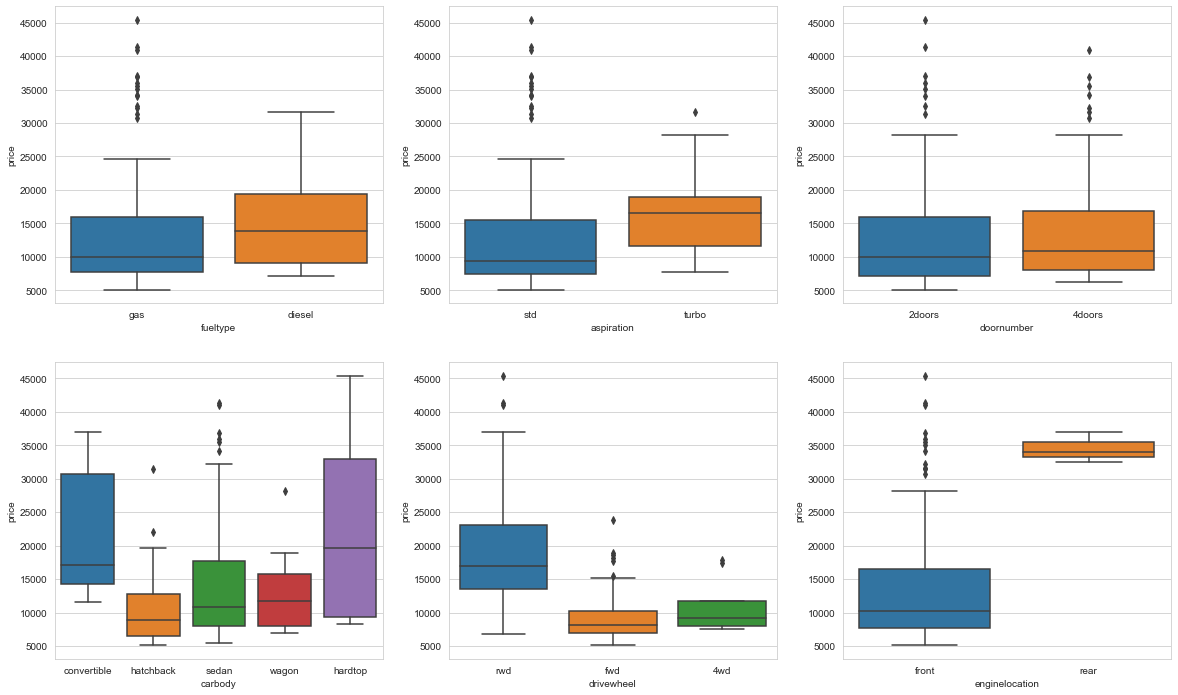

In [112]:
coList = ['fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation']

plt.figure(figsize=(20, 12))
i = 1
for col in coList:
    plt.subplot(2,3,i)
    sns.boxplot(x = col, y = 'price', data = df_Cars)
    i += 1
plt.show()

#### Insights from above plots based on the categorical variables.
- We can clearly see diesel cars price have bigger range than gas cars.Diesel cars are more costlier than gas driven cars.
- Cars with engine location at the rear are more costly than the cars having engines in front.
- Price ranges of hardtop and convertible are spread across different price ranges where as others are in lower range.

Let's see the above insights can be used in model predictions.

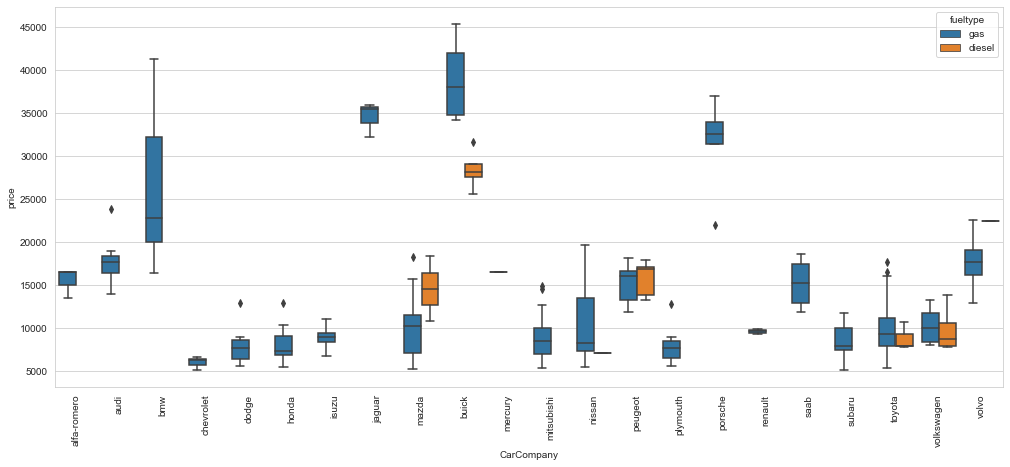

In [113]:
# Let's see how car company brand names impact prices based on fuel types.
plt.figure(figsize = (17, 7))
sns.boxplot(x = 'CarCompany', y = 'price', hue = 'fueltype', data = df_Cars)
plt.xticks(rotation= 90)
plt.show()

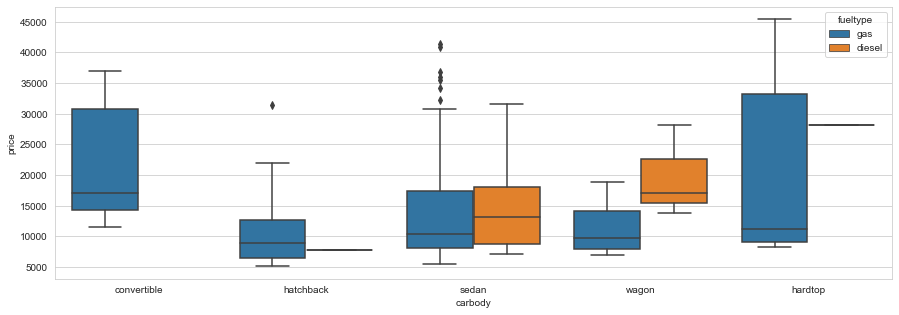

In [114]:
# Now let's see how car body type based on fuel type prices varies. 
plt.figure(figsize = (15, 5))
sns.boxplot(x = 'carbody', y = 'price', hue = 'fueltype', data = df_Cars)
plt.show()               

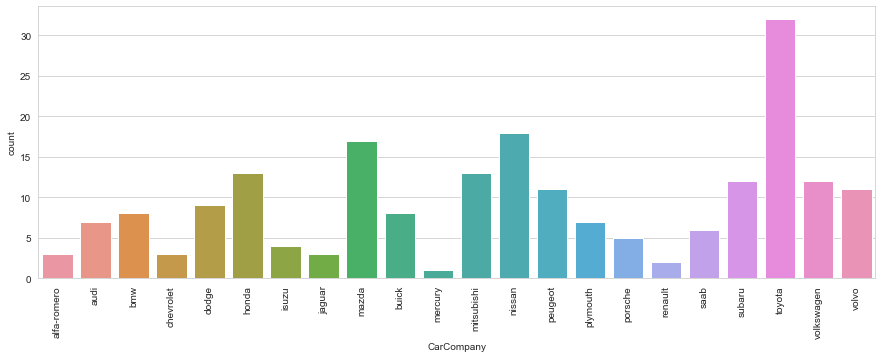

In [115]:
#No of cars models sold based on Car companies in the market.
plt.figure(figsize = (15, 5))
sns.countplot(x = 'CarCompany', data = df_Cars)
plt.xticks(rotation= 90)
plt.show()

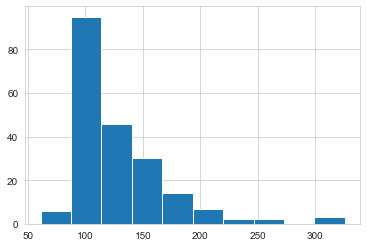

In [116]:
df_Cars['enginesize'].hist()

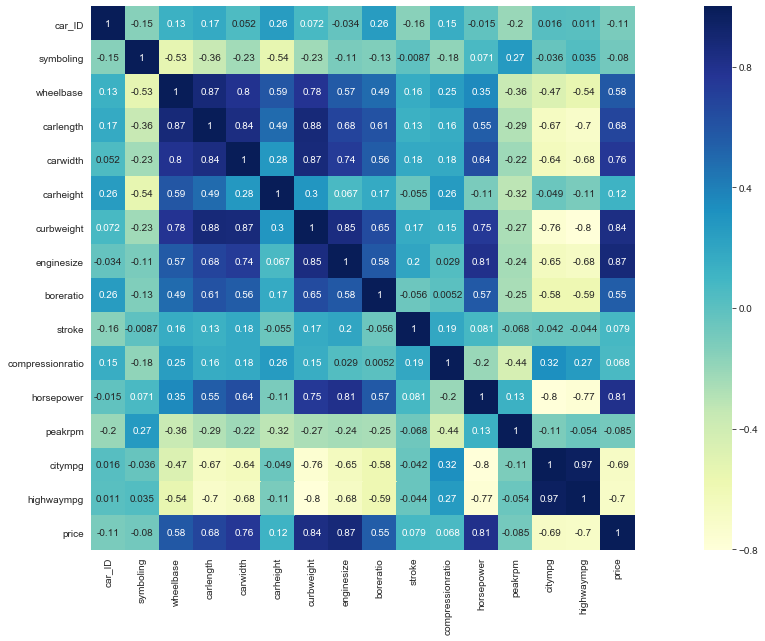

In [117]:
# Let's try to find the corelations between prices and other features in this heat map

plt.figure(figsize = (25,10))
ax = sns.heatmap(df_Cars.corr(),cmap="YlGnBu", annot=True,square=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xticks(rotation= 90)
plt.yticks(rotation= 0) 
plt.show()

In [118]:
corr_matrix = df_Cars.corr()
corrdf = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
corrdf = corrdf.unstack().reset_index()
corrdf.columns = ['Col1', 'Col2', 'Correlation']
corrdf.dropna(subset = ['Correlation'], inplace = True)

In [119]:
corrdf[(corrdf['Col1'] == 'price')].sort_values('Correlation', ascending = False)

,Col1,Col2,Correlation
247,price,enginesize,0.874145
246,price,curbweight,0.835305
251,price,horsepower,0.808139
244,price,carwidth,0.759325
243,price,carlength,0.682920
242,price,wheelbase,0.577816
248,price,boreratio,0.553173
245,price,carheight,0.119336
249,price,stroke,0.079443
250,price,compressionratio,0.067984


#### Correlation table above clearly shows correlation of price column with the following
##### Top 5
- enginesize	0.863011
- curbweight	0.845345
- horsepower	0.812608
- carwidth	    0.762071
- carlength     0.684234

##### Negative top 3
- highwaympg	-0.679994
- citympg	    -0.672783
- peakrpm	    -0.068469
	

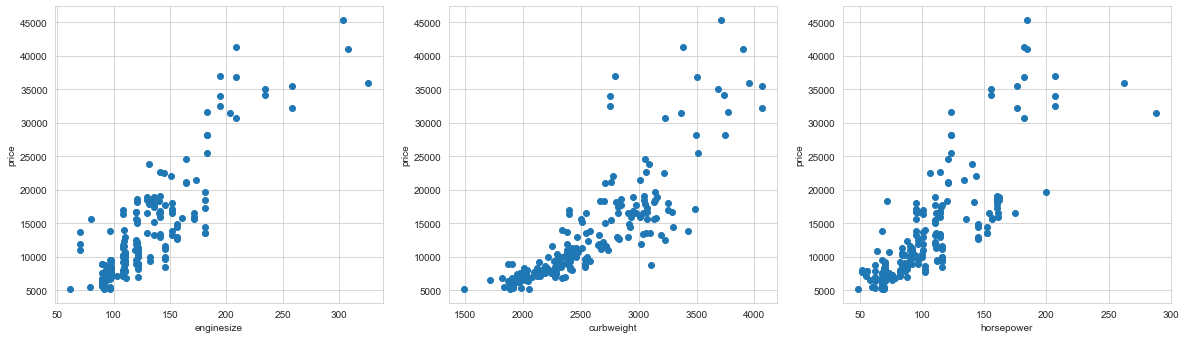

In [120]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
plt.scatter(df_Cars.enginesize, df_Cars.price)
plt.xlabel('enginesize')
plt.ylabel('price')
plt.subplot(2,3,2)
plt.scatter(df_Cars.curbweight, df_Cars.price)
plt.xlabel('curbweight')
plt.ylabel('price')
plt.subplot(2,3,3)
plt.scatter(df_Cars.horsepower, df_Cars.price)
plt.xlabel('horsepower')
plt.ylabel('price')
plt.show()

### Dummy Variables

In [121]:
# Get the dummy variables for the categorical features
categoricalCols = ['symboling','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem','CarCompany']

dfCars_new = df_Cars

for col in categoricalCols:
    tempCol = pd.get_dummies(dfCars_new[col], drop_first = True)
    dfCars_new = pd.concat([dfCars_new,tempCol], axis = 1)
    dfCars_new = dfCars_new.drop([col], axis = 1)
    
dfCars_new = dfCars_new.drop(['CarName'], axis = 1)

In [122]:
#New shape of the dataframe
dfCars_new.shape

(205, 70)

In [123]:
dfCars_new.head()

,car_ID,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,-1,0,1,2,3,gas,turbo,4doors,hardtop,hatchback,sedan,wagon,fwd,rwd,rear,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,0,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Step 4: Splitting the Data into Training and Testing Sets

First basic step for regression is performing a train-test split.

In [124]:
np.random.seed(0)
dfTrain, dfTest = train_test_split(dfCars_new, train_size = 0.8, test_size = 0.2, random_state = 100)

In [125]:
dfTrain.shape

(164, 70)

In [126]:
dfTest.shape

(41, 70)

### Rescaling the Features 

We will use MinMax scaling.

In [127]:
scaler = MinMaxScaler()

In [128]:
# Apply scaler() to all the columns except 'dummy' variables
num_var = ['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']

dfTrain[num_var] = scaler.fit_transform(dfTrain[num_var])

dfTrain.head()

,car_ID,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,-1,0,1,2,3,gas,turbo,4doors,hardtop,hatchback,sedan,wagon,fwd,rwd,rear,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
3,4,0.455172,0.577236,0.491667,0.541667,0.329325,0.181132,0.404762,0.611111,0.18750,0.225000,0.551020,0.305556,0.351351,0.243998,0,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
157,158,0.313793,0.409756,0.341667,0.416667,0.240884,0.139623,0.404762,0.424242,0.12500,0.091667,0.265306,0.472222,0.540541,0.057463,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
81,82,0.334483,0.518699,0.425000,0.133333,0.325834,0.230189,0.531746,0.641414,0.09375,0.166667,0.346939,0.333333,0.405405,0.093406,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
32,33,0.244828,0.144715,0.308333,0.400000,0.135376,0.067925,0.182540,0.444444,0.19375,0.050000,0.551020,0.694444,0.675676,0.007763,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
99,100,0.365517,0.525203,0.408333,0.575000,0.324282,0.222642,0.515873,0.646465,0.09375,0.204167,0.428571,0.388889,0.459459,0.105838,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [129]:
dfTrain.describe()

,car_ID,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,-1,0,1,2,3,gas,turbo,4doors,hardtop,hatchback,sedan,wagon,fwd,rwd,rear,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.00000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.00000,164.000000,164.000000,164.000000,164.000000,164.000000,164.00000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.0,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.0,164.000000,164.000000,164.000000,164.000000,164.00000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,98.987805,0.404605,0.519899,0.454726,0.482927,0.398579,0.236493,0.489983,0.542159,0.202866,0.221037,0.400448,0.352642,0.385794,0.211153,0.097561,0.329268,0.292683,0.140244,0.128049,0.896341,0.170732,0.567073,0.02439,0.341463,0.469512,0.134146,0.628049,0.323171,0.012195,0.006098,0.054878,0.719512,0.079268,0.054878,0.02439,0.060976,0.762195,0.121951,0.006098,0.006098,0.02439,0.353659,0.018293,0.103659,0.006098,0.414634,0.042683,0.0,0.042683,0.036585,0.030488,0.018293,0.054878,0.067073,0.018293,0.018293,0.085366,0.0,0.067073,0.091463,0.048780,0.030488,0.02439,0.012195,0.018293,0.067073,0.146341,0.067073,0.036585
std,59.891106,0.197731,0.197651,0.179980,0.205820,0.202330,0.148945,0.203913,0.153546,0.255795,0.164011,0.192302,0.185496,0.188116,0.212491,0.297629,0.471387,0.456388,0.348303,0.335168,0.305751,0.377427,0.496998,0.15473,0.475653,0.500598,0.341853,0.484806,0.469120,0.110092,0.078087,0.228440,0.450613,0.270984,0.228440,0.15473,0.240018,0.427043,0.328232,0.078087,0.078087,0.15473,0.479569,0.134418,0.305751,0.078087,0.494168,0.202760,0.0,0.202760,0.188317,0.172452,0.134418,0.228440,0.250915,0.134418,0.134418,0.280281,0.0,0.250915,0.289150,0.216069,0.172452,0.15473,0.110092,0.134418,0.250915,0.354531,0.250915,0.188317
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45.750000,0.272414,0.409756,0.308333,0.341667,0.247673,0.135849,0.293651,0.464646,0.098437,0.090625,0.265306,0.194444,0.216216,0.070475,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,97.500000,0.341379,0.502439,0.425000,0.491667,0.347944,0.184906,0.468254,0.555556,0.125000,0.183333,0.428571,0.333333,0.378378,0.132856,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1

In [130]:
corr_matrix = dfTrain.corr()
corrdf = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
corrdf = corrdf.unstack().reset_index()
corrdf.columns = ['Col1', 'Col2', 'Correlation']
corrdf.dropna(subset = ['Correlation'], inplace = True)
#corrdf.Correlation = abs(corrdf.Correlation)
corrdf.sort_values('Correlation', ascending = False)

,Col1,Col2,Correlation
2905,two,rotor,1.000000
3089,idi,compressionratio,0.985047
922,highwaympg,citympg,0.972878
4301,peugeot,l,0.939782
4653,subaru,ohcf,0.913834
...,...,...,...
915,highwaympg,curbweight,-0.774536
850,citympg,horsepower,-0.788538
1987,rwd,fwd,-0.897904
1409,gas,compressionratio,-0.985047


### Dividing into X and Y sets for the model building

In [131]:
y_train = dfTrain.pop('price') #y_train will contain our dependent variable
X_train = dfTrain # X_train will contain rest of the predictor variables.

In [132]:
lm = LinearRegression()

In [133]:
lm.fit(X_train,y_train)
# Using RFE we are trying to filter out on the significant variables which we can use for our model.

rfe = RFE(lm, 15)
rfe = rfe.fit(X_train,y_train)

In [134]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('car_ID', False, 53),
 ('wheelbase', False, 24),
 ('carlength', False, 20),
 ('carwidth', True, 1),
 ('carheight', False, 15),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', False, 33),
 ('horsepower', False, 40),
 ('peakrpm', False, 17),
 ('citympg', False, 45),
 ('highwaympg', False, 22),
 (-1, False, 6),
 (0, False, 5),
 (1, False, 3),
 (2, False, 2),
 (3, False, 4),
 ('gas', False, 35),
 ('turbo', False, 30),
 ('4doors', False, 48),
 ('hardtop', False, 26),
 ('hatchback', False, 27),
 ('sedan', False, 29),
 ('wagon', False, 28),
 ('fwd', False, 52),
 ('rwd', False, 41),
 ('rear', True, 1),
 ('dohcv', False, 9),
 ('l', False, 8),
 ('ohc', False, 39),
 ('ohcf', False, 14),
 ('ohcv', False, 44),
 ('rotor', True, 1),
 ('five', True, 1),
 ('four', True, 1),
 ('six', False, 11),
 ('three', True, 1),
 ('twelve', True, 1),
 ('two', True, 1),
 ('2bbl', False, 47),
 ('4bbl', False, 37),
 ('idi', False, 34),
 ('mfi', 

In [135]:
col = X_train.columns[rfe.support_] #Here are 15 significant predictors
col

Index(['carwidth', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'rear',
       'rotor', 'five', 'four', 'three', 'twelve', 'two', 'bmw', 'porsche',
       'volvo'],
      dtype='object')

In [136]:
X_train.columns[~rfe.support_]

Index([          'car_ID',        'wheelbase',        'carlength',
              'carheight', 'compressionratio',       'horsepower',
                'peakrpm',          'citympg',       'highwaympg',
                       -1,                  0,                  1,
                        2,                  3,              'gas',
                  'turbo',           '4doors',          'hardtop',
              'hatchback',            'sedan',            'wagon',
                    'fwd',              'rwd',            'dohcv',
                      'l',              'ohc',             'ohcf',
                   'ohcv',              'six',             '2bbl',
                   '4bbl',              'idi',              'mfi',
                   'mpfi',             'spdi',             'spfi',
                   'audi',            'buick',        'chevrolet',
                  'dodge',            'honda',            'isuzu',
                 'jaguar',            'mazda',          'mercu

## Building model using statsmodel, for the detailed statistics

In [137]:
X_train_rfe = X_train[col]
# Let's add constant to the X_train

X_train_rfe = sm.add_constant(X_train_rfe)

In [138]:
X_train_rfe

,const,carwidth,curbweight,enginesize,boreratio,stroke,rear,rotor,five,four,three,twelve,two,bmw,porsche,volvo
3,1.0,0.491667,0.329325,0.181132,0.404762,0.611111,0,0,0,1,0,0,0,0,0,0
157,1.0,0.341667,0.240884,0.139623,0.404762,0.424242,0,0,0,1,0,0,0,0,0,0
81,1.0,0.425000,0.325834,0.230189,0.531746,0.641414,0,0,0,1,0,0,0,0,0,0
32,1.0,0.308333,0.135376,0.067925,0.182540,0.444444,0,0,0,1,0,0,0,0,0,0
99,1.0,0.408333,0.324282,0.222642,0.515873,0.646465,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,1.0,0.425000,0.354926,0.184906,0.388889,0.641414,0,0,0,1,0,0,0,0,0,0
103,1.0,0.516667,0.609775,0.452830,0.595238,0.545455,0,0,0,0,0,0,0,0,0,0
67,1.0,0.833333,0.786268,0.460377,0.714286,0.732323,0,0,1,0,0,0,0,0,0,0
24,1.0,0.291667,0.185803,0.109434,0.230159,0.525253,0,0,0,1,0,0,0,0,0,0


In [139]:
#Let's build the model now
lm = sm.OLS(y_train,X_train_rfe).fit()

In [140]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     164.1
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           6.08e-83
Time:                        21:57:01   Log-Likelihood:                 251.29
No. Observations:                 164   AIC:                            -472.6
Df Residuals:                     149   BIC:                            -426.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2307      0.035     -6.670      0.0

The values we are concerned with are - 
1. The coefficients and significance (p-values)
2. R-squared
3. F statistic and its significance
4. If all the above looks ok, we need to check the VIF score.

#### We can see clearly the above model is able to explain about 93% of the variance and also all the p- values are 0. But, we need to check the VIF scores to find out if there is any colinearity involved.

In [141]:
# Calculate the VIFs for the new model
X_train_1 = X_train_rfe.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,rotor,inf
11,two,inf
2,enginesize,79.23
1,curbweight,45.06
0,carwidth,38.77
3,boreratio,37.45
4,stroke,34.34
8,four,28.66
7,five,2.89
10,twelve,2.73


##### We can see rotor and two-cylinder have infinite value which indicates that the corresponding variable may be expressed perfectly and exactly by a linear combination of other variables. Let's try and remove the first one and try again

In [142]:
# Calculate the VIFs for the new model after removing rotor
X_train_1 = X_train_rfe.drop(['const','rotor'], axis=1)

vif = pd.DataFrame()
X = X_train_1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,enginesize,79.23
1,curbweight,45.06
0,carwidth,38.77
3,boreratio,37.45
4,stroke,34.34
7,four,28.66
10,two,3.87
6,five,2.89
9,twelve,2.73
12,porsche,2.59


#### Removing just one variables impacts all other variables.

In [143]:
#Let's build the model second time after removing INF VIF column
X_train_2 = sm.add_constant(X_train_1)

In [144]:
lm = sm.OLS(y_train,X_train_2).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     164.1
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           6.08e-83
Time:                        21:57:01   Log-Likelihood:                 251.29
No. Observations:                 164   AIC:                            -472.6
Df Residuals:                     149   BIC:                            -426.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2307      0.035     -6.670      0.0

###### We can still see the R square value is 0.939 and all p-values of coefficents are 0. Let's try and remove another feature from our VIF list.
But instead of removing the next highest VIF column let's try to remove boreratio column as we previously saw enginesize, curbweight, carwidth are highly corelated with price.

In [145]:
X_train_3 = X_train_2.drop(['const','boreratio'], axis=1)

vif = pd.DataFrame()
X = X_train_3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,enginesize,44.69
1,curbweight,44.59
0,carwidth,38.67
3,stroke,17.64
6,four,8.90
11,porsche,2.41
5,five,2.39
4,rear,2.32
9,two,2.03
8,twelve,1.86


In [146]:
#Let's build the model third time
X_train_3 = sm.add_constant(X_train_3)
lm = sm.OLS(y_train,X_train_3).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     124.8
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           2.03e-73
Time:                        21:57:02   Log-Likelihood:                 224.31
No. Observations:                 164   AIC:                            -420.6
Df Residuals:                     150   BIC:                            -377.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1339      0.038     -3.543      0.0

##### We notice R square value has become 0.915 and also few coefficents' p-value changed from 0. Let's try and remove the column four having the highest p-value which also means it is least significant in predicting.

In [147]:
#Let's build the model fourth time
X_train_4 = X_train_3.drop(['four'], axis=1)

lm = sm.OLS(y_train,X_train_4).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     136.1
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           1.70e-74
Time:                        21:57:02   Log-Likelihood:                 224.31
No. Observations:                 164   AIC:                            -422.6
Df Residuals:                     151   BIC:                            -382.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1360      0.024     -5.747      0.0

##### We notice R square value is still 0.915. Let's try and remove the column twelve having the next highest p-value which also means it is least significant in predicting.

In [148]:
#Let's build the model fifth time
X_train_5 = X_train_4.drop(['twelve'], axis=1)

lm = sm.OLS(y_train,X_train_5).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     148.9
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           1.77e-75
Time:                        21:57:02   Log-Likelihood:                 224.02
No. Observations:                 164   AIC:                            -424.0
Df Residuals:                     152   BIC:                            -386.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1393      0.023     -6.002      0.0

##### We notice R square value has become 0.914. Let's try and remove the column stroke having the next highest p-value which also means it is least significant in predicting.

In [149]:
#Let's build the model sixth time
X_train_6 = X_train_5.drop(['stroke'], axis=1)

lm = sm.OLS(y_train,X_train_6).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     163.0
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           3.01e-76
Time:                        21:57:02   Log-Likelihood:                 223.15
No. Observations:                 164   AIC:                            -424.3
Df Residuals:                     153   BIC:                            -390.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1604      0.016     -9.869      0.0

##### We notice R square value is still 0.914. We can notice all other features' p-value is less than 0.05. Let's find the VIF with our remaining features.

In [150]:
X_train_vif = X_train_6.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_vif
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,curbweight,38.38
0,carwidth,20.89
2,enginesize,19.41
3,rear,2.17
8,porsche,2.17
4,five,1.27
6,two,1.22
7,bmw,1.13
9,volvo,1.12
5,three,1.00


In [151]:
#Let's build the model seventh time after removing least of the top 3 correlated column.
X_train_7 = X_train_6.drop(['carwidth'], axis=1)

lm = sm.OLS(y_train,X_train_7).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     167.8
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           7.06e-75
Time:                        21:57:02   Log-Likelihood:                 216.96
No. Observations:                 164   AIC:                            -413.9
Df Residuals:                     154   BIC:                            -382.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1212      0.012    -10.039      0.0

In [152]:
#Let's build the model eigth time after removing three column because of its p-value which is more than 0.05.
X_train_8 = X_train_7.drop(['three'], axis=1)

lm = sm.OLS(y_train,X_train_8).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     185.6
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           2.50e-75
Time:                        21:57:02   Log-Likelihood:                 215.24
No. Observations:                 164   AIC:                            -412.5
Df Residuals:                     155   BIC:                            -384.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1173      0.012     -9.804      0.0

##### We notice R square value is still 0.905 with all predictors' p-value 0. We need check for VIF scores again.

In [153]:
X_train_vif1 = X_train_8.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_vif1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,curbweight,19.91
1,enginesize,19.41
6,porsche,2.09
2,rear,2.06
3,five,1.21
4,two,1.21
5,bmw,1.12
7,volvo,1.12


##### We notice there are still two more features having VIF more than 5, let's remove the curbweight feature and try

In [154]:
X_train_9 = X_train_8.drop(['curbweight'], axis=1)

In [155]:
#Let's build the model for ninth time
lm = sm.OLS(y_train,X_train_9).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     167.4
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           3.67e-69
Time:                        21:57:03   Log-Likelihood:                 197.39
No. Observations:                 164   AIC:                            -378.8
Df Residuals:                     156   BIC:                            -354.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0802      0.011     -6.988      0.0

In [156]:
X_train_vif2 = X_train_9.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_vif2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,porsche,2.08
1,rear,2.00
0,enginesize,1.39
2,five,1.12
4,bmw,1.11
6,volvo,1.07
3,two,1.00


##### We notice all features are having VIF less than 5 that means colinearity is removed and our Final R square value is 0.882. We are able to explain 88% of data variance with our model.

In [157]:
lm.params

const        -0.080221
enginesize    1.078824
rear          0.174425
five          0.159663
two           0.251709
bmw           0.238976
porsche       0.204474
volvo         0.123183
dtype: float64

## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [158]:
y_train_price_pred = lm.predict(X_train_9)

Text(0.5, 0, 'Errors')

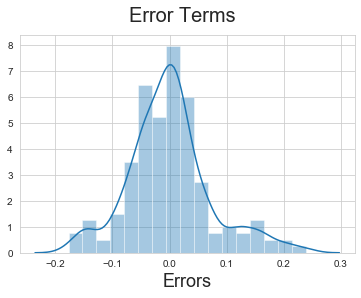

In [159]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price_pred))
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. ninth model.

#### Applying the scaling on the test sets

In [160]:
dfTest[num_var] = scaler.transform(dfTest[num_var])

In [161]:
dfTest.describe()

,car_ID,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,-1,0,1,2,3,gas,turbo,4doors,hardtop,hatchback,sedan,wagon,fwd,rwd,rear,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.0,41.000000,41.000000,41.000000,41.000000,41.0,41.000000,41.000000,41.000000,41.0,41.0,41.0,41.000000,41.0,41.000000,41.0,41.000000,41.000000,41.000000,41.0,41.000000,41.000000,41.0,41.0,41.000000,41.000000,41.0,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.0,41.000000,41.000000,41.000000,41.000000,41.000000
mean,119.048780,0.477544,0.599207,0.517683,0.536992,0.476215,0.297561,0.618467,0.521803,0.170579,0.284959,0.388253,0.286585,0.315096,0.282376,0.146341,0.317073,0.146341,0.219512,0.146341,0.926829,0.219512,0.536585,0.097561,0.341463,0.463415,0.073171,0.414634,0.560976,0.024390,0.0,0.073171,0.731707,0.048780,0.097561,0.0,0.024390,0.829268,0.097561,0.0,0.0,0.0,0.195122,0.0,0.073171,0.0,0.634146,0.048780,0.024390,0.0,0.048780,0.073171,0.0,0.0,0.048780,0.024390,0.0,0.073171,0.024390,0.048780,0.073171,0.073171,0.048780,0.024390,0.0,0.073171,0.024390,0.195122,0.024390,0.121951
std,54.780905,0.237096,0.202206,0.166533,0.190905,0.190466,0.180215,0.229504,0.177540,0.216386,0.159654,0.206137,0.156943,0.168417,0.245496,0.357839,0.471117,0.357839,0.419058,0.357839,0.263652,0.419058,0.504854,0.300406,0.480091,0.504854,0.263652,0.498779,0.502433,0.156174,0.0,0.263652,0.448575,0.218085,0.300406,0.0,0.156174,0.380949,0.300406,0.0,0.0,0.0,0.401218,0.0,0.263652,0.0,0.487652,0.218085,0.156174,0.0,0.218085,0.263652,0.0,0.0,0.218085,0.156174,0.0,0.263652,0.156174,0.218085,0.263652,0.263652,0.218085,0.156174,0.0,0.263652,0.156174,0.401218,0.156174,0.331295
min,12.000000,0.000000,0.056911,0.291667,0.158333,0.128394,0.109434,-0.111111,-0.060606,0.000000,0.083333,0.000000,0.027778,-0.027027,0.012542,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,75.000000,0.320690,0.497561,0.408333,0.400000,0.347944,0.184906,0.468254,0.469697,0.100000,0.154167,0.265306,0.166667,0.216216,0.105810,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,119.000000,0.431034,0.570732,0.516667,0.591667,0.483320,0.230189,0.682540,0.525253,0.125000,0.266667,0.346939,0.277778,0.297297,0.231539,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,168.0000

##### Dividing into X_test and y_test

In [162]:
y_test = dfTest.pop('price')
X_test = dfTest

In [163]:
X_test_const = sm.add_constant(X_test)

In [164]:
X_test_new = X_test_const[X_train_9.columns]

In [165]:
# Making predictions using the model

y_pred = lm.predict(X_test_new)

## Model Evaluation

Text(0, 0.5, 'y_pred')

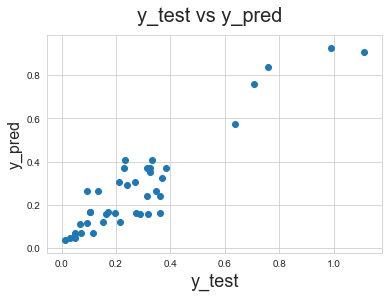

In [166]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [167]:
r2 = r2_score(y_true= y_test, y_pred= y_pred)
print(r2)

0.8639430458626182


####  Rsquare of our prediction i.e. on the Test data set is 0.86 and on our Train data set is 0.88 which quite close. we have trained our model well without overfitting.

We can see that the equation of our best fitted line is:

$ price = 1.079  \times  enginesize + 0.16  \times  five(cylinder) + 0.252 \times two(cylinder) + 0.239 \times bmw + 0.204 \times porsche + 0.123 \times volvo $

#### Finally we can answer the concerns of the Chinese Car companies.